## Read the results

In [1]:
path_to_csv = "results_classfiles/results.csv"

In [2]:
import pandas as pd

data = pd.read_csv(path_to_csv, index_col=["pid", "bid"])
data

env  checkout  compile              classfiles
pid         bid                                                 
Chart       2    True      True     True            {'1.4': 682}
            8    True      True     True            {'1.4': 608}
            25   True      True     True            {'1.4': 609}
            11   True      True     True            {'1.4': 608}
            12   True      True     True            {'1.4': 608}
...               ...       ...      ...                     ...
JacksonCore 17   True      True     True   {'1.6': 89, '1.5': 7}
            22   True      True     True  {'1.6': 101, '1.5': 8}
            14   True      True     True   {'1.6': 89, '1.5': 7}
            3    True      True     True   {'1.6': 87, '1.5': 7}
            15   True      True     True   {'1.6': 89, '1.5': 7}

[835 rows x 4 columns]

## Process the results

Check if all bugs executed correctly

In [3]:
data = data.loc[data.env & data.checkout & data.compile]
data

env  checkout  compile              classfiles
pid         bid                                                 
Chart       2    True      True     True            {'1.4': 682}
            8    True      True     True            {'1.4': 608}
            25   True      True     True            {'1.4': 609}
            11   True      True     True            {'1.4': 608}
            12   True      True     True            {'1.4': 608}
...               ...       ...      ...                     ...
JacksonCore 17   True      True     True   {'1.6': 89, '1.5': 7}
            22   True      True     True  {'1.6': 101, '1.5': 8}
            14   True      True     True   {'1.6': 89, '1.5': 7}
            3    True      True     True   {'1.6': 87, '1.5': 7}
            15   True      True     True   {'1.6': 89, '1.5': 7}

[835 rows x 4 columns]

Now we focus on the classfiles data

In [4]:
classfiles = data.classfiles
classfiles

pid          bid
Chart        2                {'1.4': 682}
             8                {'1.4': 608}
             25               {'1.4': 609}
             11               {'1.4': 608}
             12               {'1.4': 608}
                             ...          
JacksonCore  17      {'1.6': 89, '1.5': 7}
             22     {'1.6': 101, '1.5': 8}
             14      {'1.6': 89, '1.5': 7}
             3       {'1.6': 87, '1.5': 7}
             15      {'1.6': 89, '1.5': 7}
Name: classfiles, Length: 835, dtype: object

In [5]:
import ast

classfiles_dicts = [ast.literal_eval(entry) for entry in classfiles]

## Analyse the results

How many classfile versions does each project have?

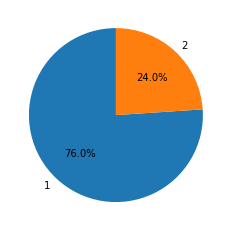

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import json

classfile_versions_per_project = {}
for size in [len(entry) for entry in classfiles_dicts]:
    if size in classfile_versions_per_project:
        classfile_versions_per_project[size] += 1
    else:
        classfile_versions_per_project[size] = 1
plt.pie(classfile_versions_per_project.values(), labels=classfile_versions_per_project.keys(), autopct='%1.1f%%', startangle=90)
plt.show()

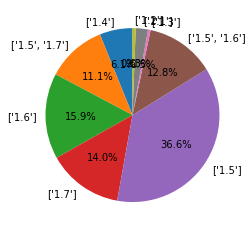

{"['1.4']": 51,
 "['1.5', '1.7']": 93,
 "['1.6']": 133,
 "['1.7']": 117,
 "['1.5']": 306,
 "['1.5', '1.6']": 107,
 "['1.3']": 4,
 "['1.1']": 19,
 "['1.2']": 5}

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import json

paired_versions_per_project = [str(sorted(list(entry.keys()))) for entry in classfiles_dicts]
paired_versions = {}
for pair in paired_versions_per_project:
    if pair in paired_versions:
        paired_versions[pair] += 1
    else:
        paired_versions[pair] = 1
plt.pie(paired_versions.values(), labels=paired_versions.keys(), autopct='%1.1f%%', startangle=90)
plt.show()

paired_versions

What is the distribution of version throughout all classfiles?

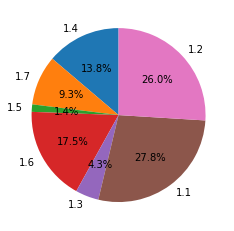

In [8]:
classfile_versions = {}
for project in classfiles_dicts:
    for version in project:
        if version in classfile_versions_per_project:
            classfile_versions[version] += project[version]
        else:
            classfile_versions[version] = project[version]
plt.pie(classfile_versions.values(), labels=classfile_versions.keys(), autopct='%1.1f%%', startangle=90)
plt.show()

What is the distribution if we consider only one version per project?

{'1.4': 51, '1.7': 210, '1.6': 240, '1.5': 306, '1.3': 4, '1.1': 19, '1.2': 5}


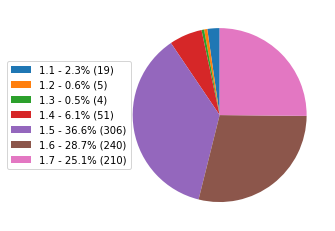

In [9]:
classfile_versions = {}
for project in classfiles_dicts:
    max_entry = None
    max_value = -1
    for version in project:
        if project[version] > max_value:
            max_entry = version
            max_value = project[version]
    if max_entry in classfile_versions.keys():
        classfile_versions[max_entry] += 1
    else:
        classfile_versions[max_entry] = 1
        
print(classfile_versions)
        
def label_func(x, pct, total):
    absolute = int(np.round(pct/100.*total))
    return "{} - {:.1f}% ({:d})".format(x, pct, absolute)

x = np.array(sorted(list(classfile_versions.keys())))
y = np.array([classfile_versions[xi] for xi in x])
total = y.sum()
percent = 100.*y/total

patches, texts = plt.pie(y, startangle=90)
labels = [label_func(x, pct, total) for x, pct in zip(x, percent)]

plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.5, 0.5))
plt.savefig("classfiles.svg", bbox_inches = "tight")
plt.show()